## Load packages

In [1]:
library(tidyverse)
library(anomalize)
library(ggQC)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



## Create sample dataset with 1 outlier value2

In [2]:
set.seed(1)
sample <- data.frame(Month = seq(ISOdate(2000,1,1), by = "month", length = 5), Value = c(rnorm(5, 2000, 500)))
sample[3, 'Value']<- 20000
sample <- as_tibble(sample)

In [3]:
sample

Month,Value
2000-01-01 12:00:00,1686.773
2000-02-01 12:00:00,2091.822
2000-03-01 12:00:00,20000.000
2000-04-01 12:00:00,2797.640
2000-05-01 12:00:00,2164.754


## Detect outlier with IQR method

In [4]:
outliers <- iqr(sample$Value, verbose = TRUE)$outlier_report
outliers

rank,index,value,limit_lower,limit_upper,outlier,direction
1,3,20000,-25.63455,4915.097,Yes,Up


## Detect outlier with XmR method

#### XmR method doesn't find the outlier in this case. More datapoints are needed.

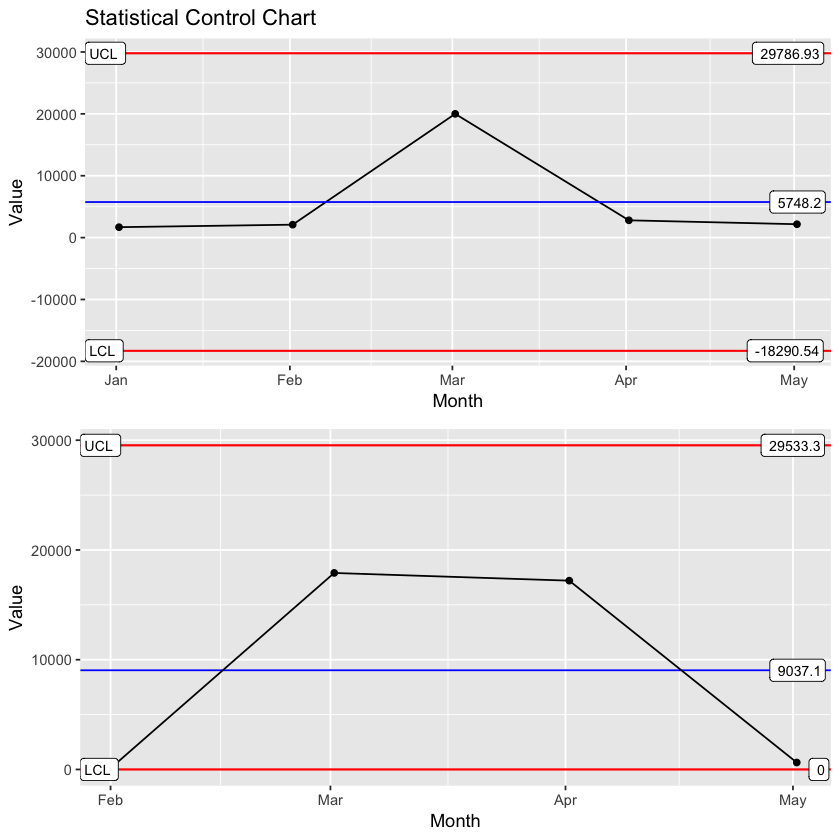

In [5]:
x_Plot <- ggplot(sample, aes(x = Month, y = Value)) + geom_point() + geom_line() + 
  stat_QC(method = 'XmR', auto.label = T, label.digits = 2, show.1n2.sigma = F) +
  ggtitle("Statistical Control Chart") 

mR_Plot <- ggplot(sample, aes(x = Month, y = Value)) + stat_mR() + stat_QC_labels(method="mR")

grid.arrange(x_Plot, mR_Plot, nrow=2)

#### Create a dataset with 8 data points

In [6]:
set.seed(1)
sample <- data.frame(Month = seq(ISOdate(2000,1,1), by = "month", length = 8), Value = c(rnorm(8, 2000, 500)))
sample[3, 'Value']<- 20000
sample <- as_tibble(sample)

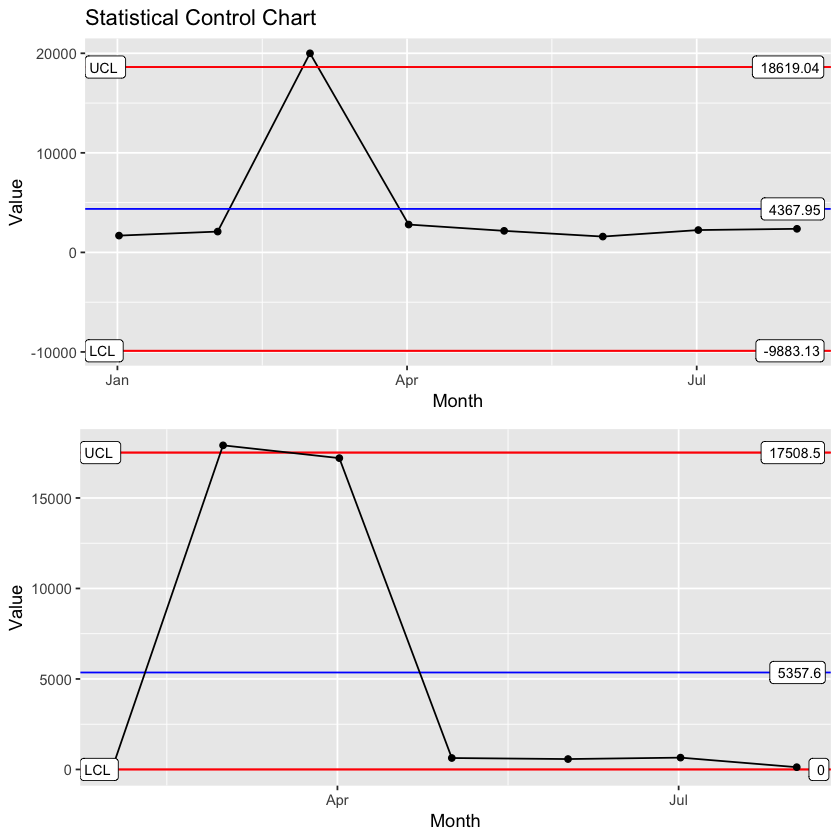

In [7]:
x_Plot <- ggplot(sample, aes(x = Month, y = Value)) + geom_point() + geom_line() + 
  stat_QC(method = 'XmR', auto.label = T, label.digits = 2, show.1n2.sigma = F) +
  ggtitle("Statistical Control Chart") 

mR_Plot <- ggplot(sample, aes(x = Month, y = Value)) + stat_mR() + stat_QC_labels(method="mR")

grid.arrange(x_Plot, mR_Plot, nrow=2)